<a href="https://colab.research.google.com/github/Nishita-Jha/Titanic-Survival-Prediction/blob/main/Titanic_survival_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv');

In [ ]:
#print rows and colums
print('No. of Rows & colums:',df.shape)
df.head()

No. of Rows & colums: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.isin([' ','?','-','null','NA']).sum().any()

np.False_

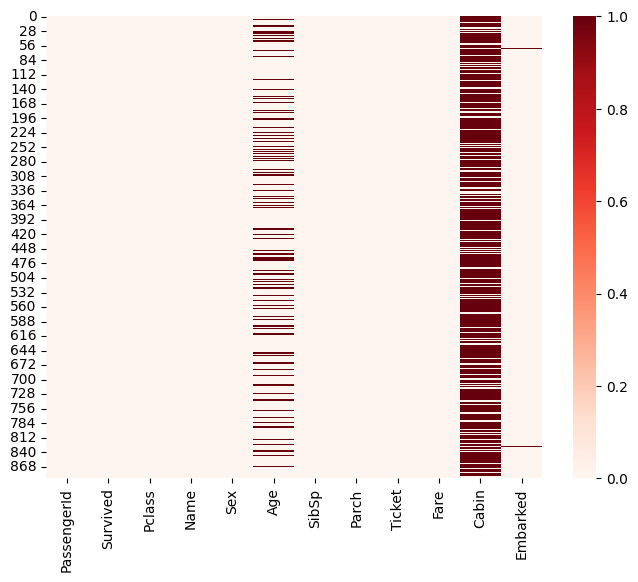

In [ ]:
#Determining null values
plt.figure(figsize = (8,6)) #figsize = (width,height)
sns.heatmap(df.isnull(),cmap = 'Reds') #light = true, dark = false
plt.show()

In [ ]:
missing_val = df.isnull().sum().sort_values(ascending = False)
perct_missing_val =(missing_val/len(df))*100
pd.concat([missing_val, perct_missing_val], axis =1, keys =['Missing Values', '% Missing data'])

,Missing Values,% Missing data
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
df.nunique()
#Sibsp = sibling/spouse
#parch = Parent/child
#pclass = Passenger (upper,middle,lower) class
#fare = price of ticket(paid)
#embarked = name of ports

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
 #contains null value more than 50%,drop
df.drop(columns=['Cabin'],inplace = True)

In [ ]:
#count the number of occurrences.
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


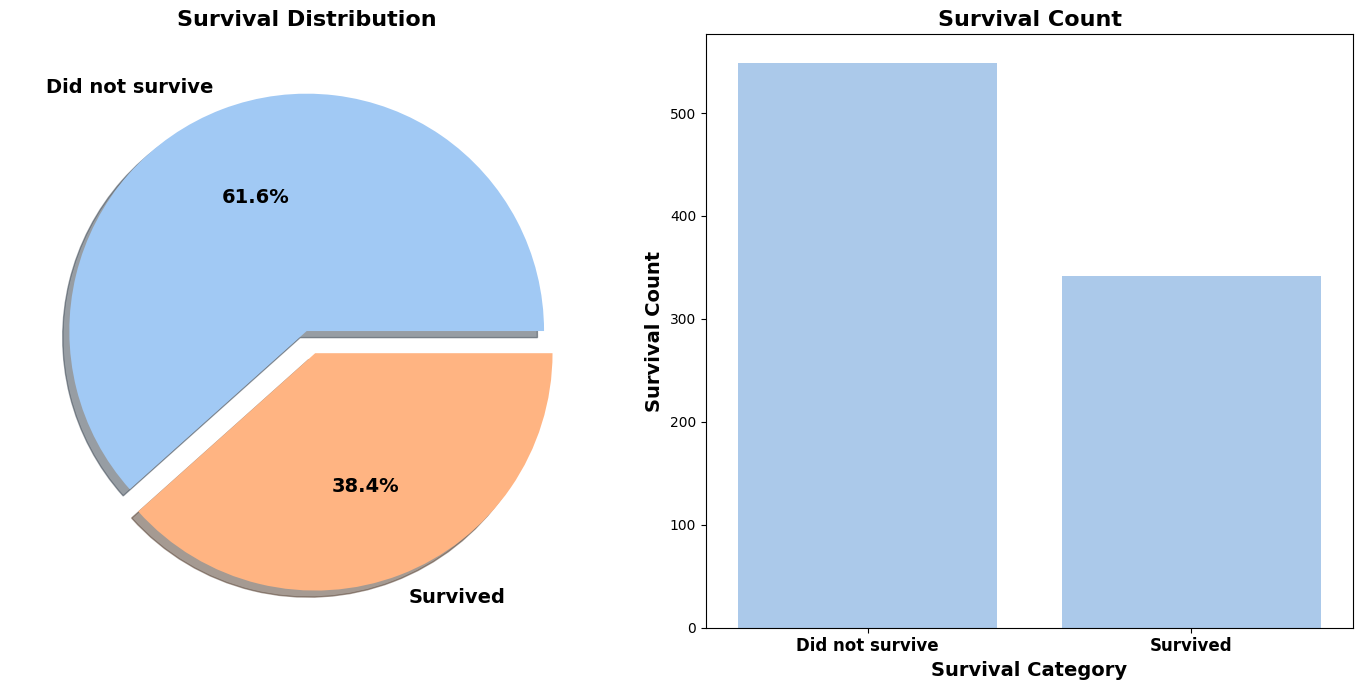

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('pastel')

# 1 row 2 column subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# PIE CHART
df['Survived'].value_counts().plot.pie(
    labels=['Did not survive', 'Survived'],
    explode=[0, 0.1],
    autopct='%1.1f%%',
    textprops={'fontsize': 14, 'fontweight': 'bold'},
    shadow=True,
    ax=axes[0]
)
axes[0].set_title('Survival Distribution', fontsize=16, fontweight='bold')
axes[0].set_ylabel('')

#BAR PLOT
sns.countplot(x='Survived', data=df, ax=axes[1])
axes[1].set_title('Survival Count', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Survival Category', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Count', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Did not survive', 'Survived'], fontsize=12, fontweight='bold')
plt.show()


In [ ]:
#Group the data based on gender & survival status
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

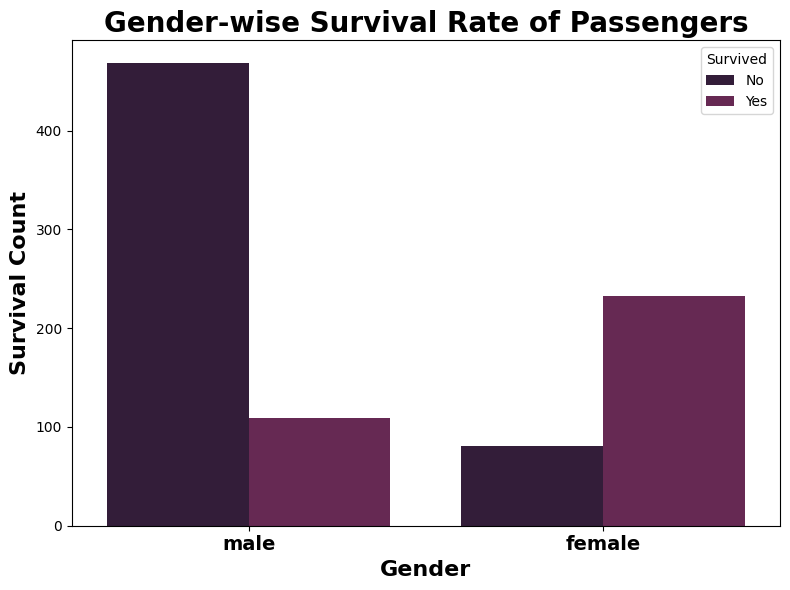

In [ ]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rocket')

plt.figure(figsize=(8,6))

#Gender-wise survival counts
sns.countplot(x='Sex', hue='Survived', data=df)

plt.title('Gender-wise Survival Rate of Passengers', fontsize=20, fontweight='bold')
plt.xlabel("Gender", fontsize=16, fontweight='bold')
plt.ylabel("Survival Count", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


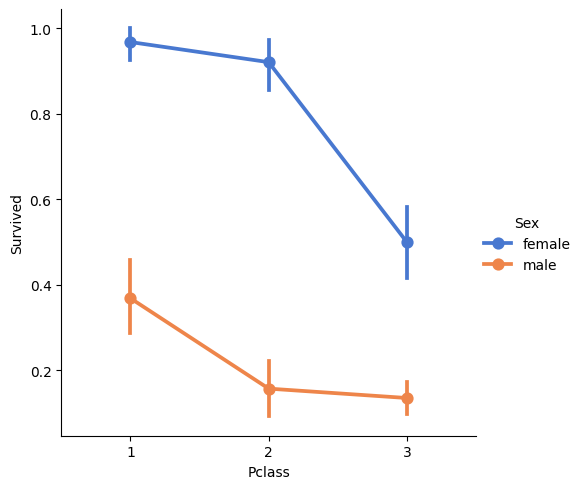

In [ ]:
#Survival of male and female of Pclass
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point',palette='muted')
plt.show()

In [ ]:
print("Before:", df['Age'].isnull().sum())
df['Age'].fillna(df['Age'].mean(), inplace=True)
print("After:", df['Age'].isnull().sum())


Before: 177
After: 0


In [ ]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on th ship :',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on th ship : 29.69911764705882 Years


In [ ]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract("([A-Za-z]+)\.")
df.groupby('Initial')['Age'].mean()

,Age
Initial,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,40.242731
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,7.086662


In [ ]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
df.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,7.086662
Miss,23.377249
Mr,32.049894
Mrs,35.140827
Other,45.888889


In [ ]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)
df.loc[((df.Age.isnull())&(df.Initial)=='Mr'), 'Age']=32.73
df.loc[((df.Age.isnull())&(df.Initial)=='Mrs'), 'Age']=35.98
df.loc[((df.Age.isnull())&(df.Initial)=='Master'), 'Age']=4.57
df.loc[((df.Age.isnull())&(df.Initial)=='Miss'), 'Age']=21.86
df.loc[((df.Age.isnull())&(df.Initial)=='Other'), 'Age']=45.889

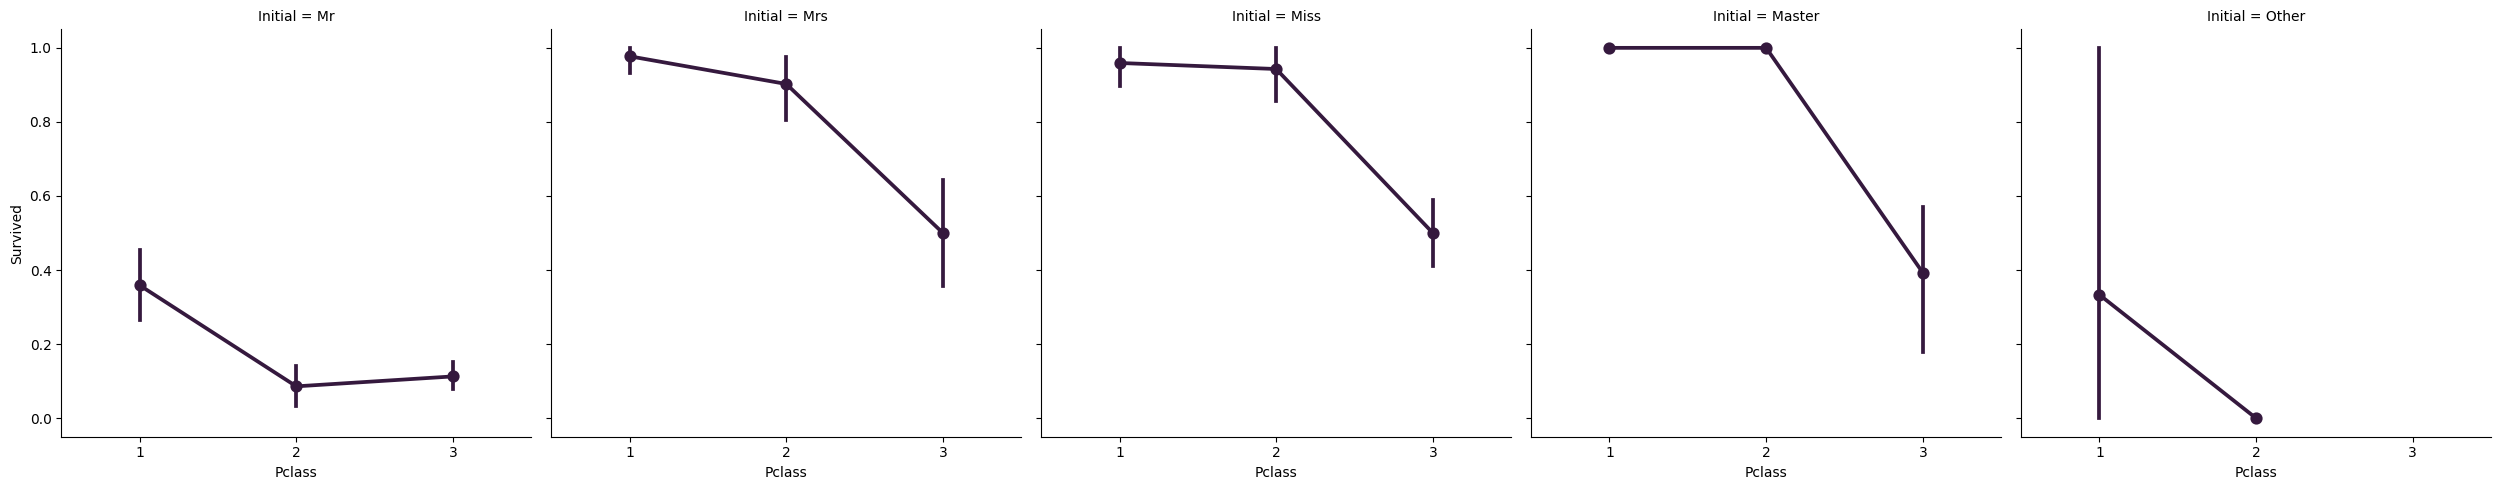

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial', kind='point',data=df)
plt.tight_layout()
plt.show()

In [ ]:
#survival of male and female in embarked & Pclass
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='Greens')

In [ ]:
#Survival of sibling/spouse
pd.crosstab([df.SibSp],[df.Survived],margins=True).style.background_gradient(cmap='Greens')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [ ]:
#Survival of Parent/child
pd.crosstab([df.Parch],[df.Pclass],margins=True).style.background_gradient(cmap='Greens')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


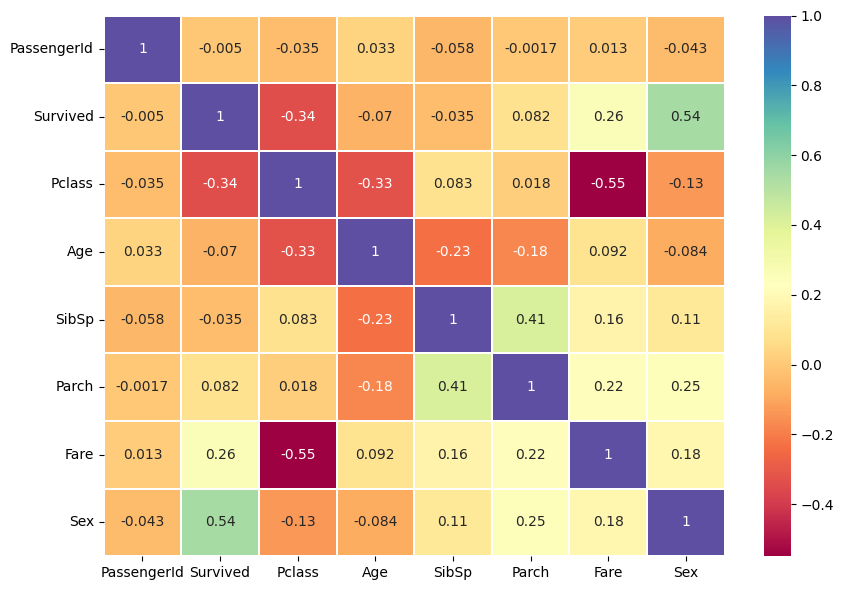

In [ ]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=np.number)

# Encode the 'Sex' column
numerical_df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

plt.figure(figsize=(9,6))
sns.heatmap(numerical_df.corr(), annot= True, cmap='Spectral',linewidths=0.3)
plt.show()

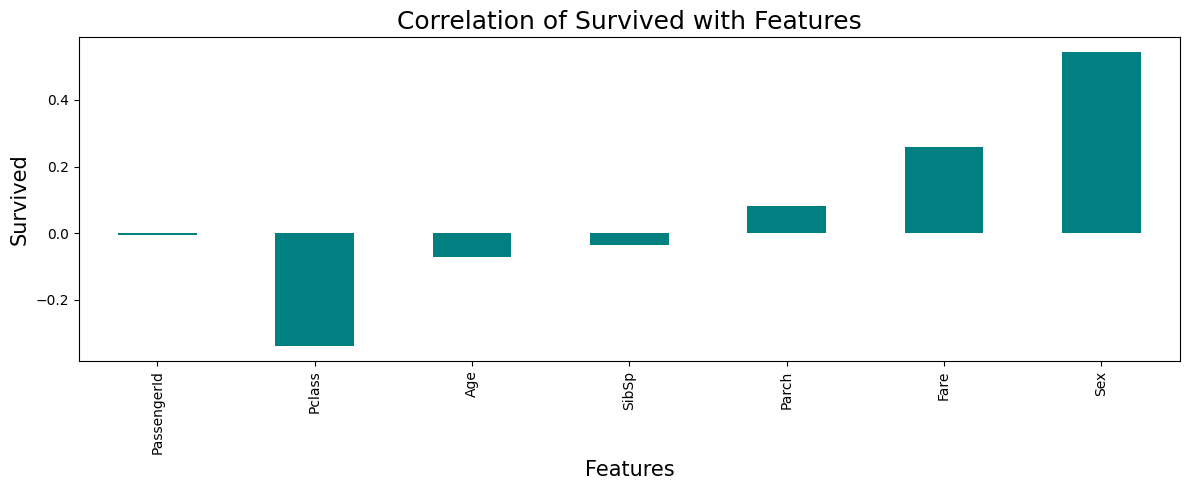

In [ ]:
#correlation with target variable(Survived)
plt.figure(figsize = (12,5))
numerical_df.corr()['Survived'].drop(['Survived']).plot(kind='bar',color = 'teal')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

In [ ]:
#Data preprocessing
df.columns.to_series().groupby(df.dtypes).groups
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked', 'Initial']}

In [ ]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']

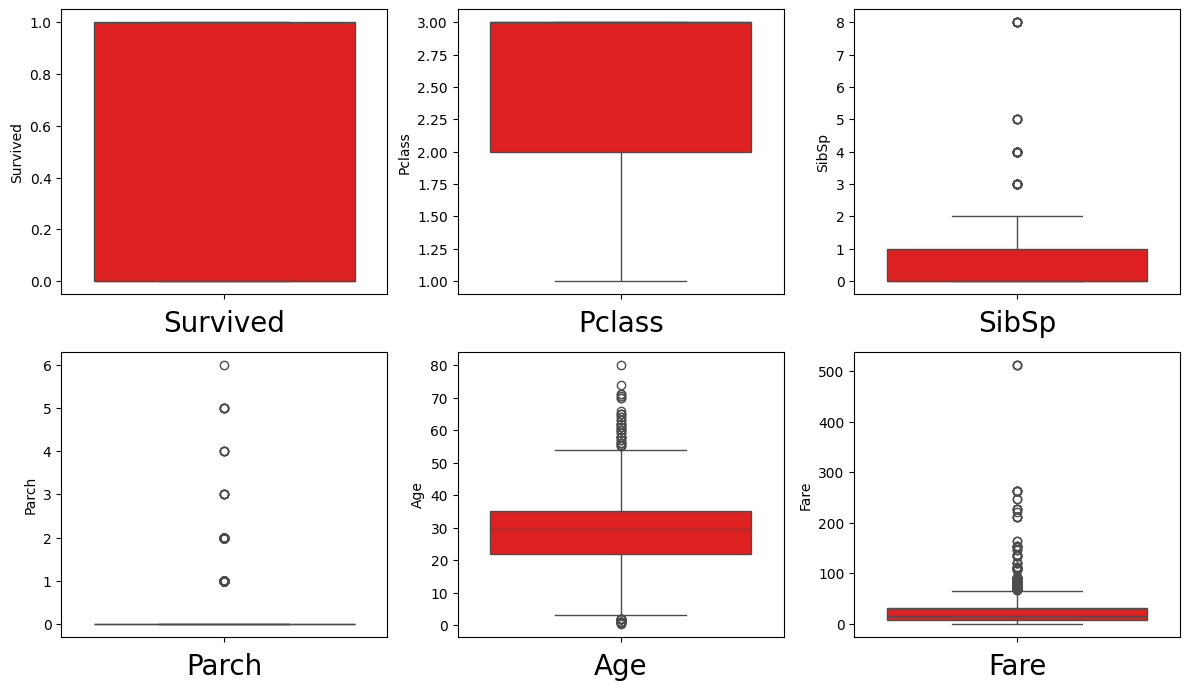

In [ ]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='red')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout() #gaps between subplots

In [ ]:
# Outlier detection

def detect_outliers(df,n,features):
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(df[col], 25)

        Q3 = np.percentile(df[col],75)

        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

In [ ]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])

In [ ]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
df.shape

(866, 9)

In [ ]:
#Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


In [ ]:
# Splitting data in target and dependent feature
X = df.drop(['Survived'], axis =1) #dependent
Y = df['Survived'] #target

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [ ]:
#importing ML model library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
#Data preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (649, 8)
Training target vector size: (649,)
Test feature matrix size: (217, 8)
Test target vector size: (217,)


In [ ]:
#Accuracy of model
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8384615384615385 on Random_state 121


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=121, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.815668202764977


Confusion matrix of Logistics Regression : 
 [[111  15]
 [ 25  66]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       126
           1       0.81      0.73      0.77        91

    accuracy                           0.82       217
   macro avg       0.82      0.80      0.81       217
weighted avg       0.82      0.82      0.81       217



In [ ]:
#cross validation score of logistic regression
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.78735632 0.78612717 0.78034682 0.76300578 0.8150289 ]
Mean CV Score : 0.7863729984718624
Std deviation : 0.016760249697107203


In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.7465437788018433


Confusion matrix of Decision Tree Classifier : 
 [[105  21]
 [ 34  57]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       126
           1       0.73      0.63      0.67        91

    accuracy                           0.75       217
   macro avg       0.74      0.73      0.73       217
weighted avg       0.75      0.75      0.74       217



In [ ]:
#cross validation score of Decisiontree classifier
CVscore = cross_val_score(dtc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.73563218 0.79190751 0.78612717 0.74566474 0.79190751]
Mean CV Score : 0.7702478240648462
Std deviation : 0.02446633809374391


In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8294930875576036


Confusion matrix of Random Forest Classifier : 
 [[110  16]
 [ 21  70]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       126
           1       0.81      0.77      0.79        91

    accuracy                           0.83       217
   macro avg       0.83      0.82      0.82       217
weighted avg       0.83      0.83      0.83       217



In [ ]:
#cross validation score of RandomForest Classifier
CVscore = cross_val_score(rfc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.78735632 0.8150289  0.86127168 0.78034682 0.83236994]
Mean CV Score : 0.8152747325759087
Std deviation : 0.029689803418803788


In [ ]:
Final_mod = LogisticRegression(fit_intercept =True,penalty= "l2",solver='newton-cg',random_state= 69)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final  LogisticRegression  Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of LogisticRegression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of  LogisticRegression'+'\033[0m \n',classification_report(Y_test, y_pred))

Final  LogisticRegression  Model
Accuracy Score :
 0.815668202764977


Confusion matrix of LogisticRegression : 
 [[111  15]
 [ 25  66]]


Classification Report of  LogisticRegression 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       126
           1       0.81      0.73      0.77        91

    accuracy                           0.82       217
   macro avg       0.82      0.80      0.81       217
weighted avg       0.82      0.82      0.81       217



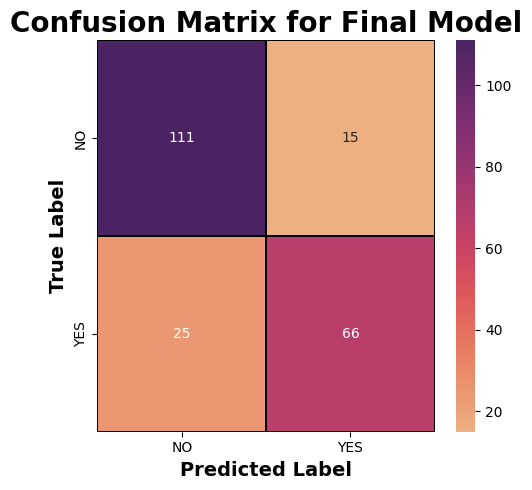

In [ ]:
#Confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,
            cmap="flare", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

In [ ]:
import joblib
joblib.dump(Final_mod,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

In [ ]:
#Prediction
prediction = Final_mod.predict(X_test)

In [ ]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame() #creating empty df
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [ ]:
df_Pred.tail()

,Predicted Values,Actual Values
212,1,1
213,1,1
214,0,1
215,0,0
216,1,1
